In [1]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt

In [2]:
dfim_profile=np.concatenate(
    [
        np.load("/Users/adamhe/github/scratch/dfim/active_full_length_irf4_tss_windows_fwd_dfim_profile.npz")["arr_0"],
        np.load("/Users/adamhe/github/scratch/dfim/active_full_length_irf4_tss_windows_rev_dfim_profile.npz")["arr_0"]
    ]
)
#dfim_profile=np.array([dfim_profile[f] for f in dfim_profile.files])

dfim_quantity=np.concatenate(
    [
        np.load("/Users/adamhe/github/scratch/dfim/active_full_length_irf4_tss_windows_fwd_dfim_quantity.npz")["arr_0"],
        np.load("/Users/adamhe/github/scratch/dfim/active_full_length_irf4_tss_windows_rev_dfim_quantity.npz")["arr_0"]
    ]
)
#dfim_quantity=np.array([dfim_quantity[f] for f in dfim_quantity.files])

In [3]:
dfim_quantity_ = np.abs(
    dfim_quantity#.clip(min=np.percentile(dfim_quantity, 0.01), max=np.percentile(dfim_quantity, 99.99))
).mean(axis=0)[250-100:250+100, 500-100:500+100].transpose()
dfim_profile_ = np.abs(
    dfim_profile#.clip(min=np.percentile(dfim_profile, 0.01), max=np.percentile(dfim_profile, 99.99))
).mean(axis=0)[250-100:250+100, 500-100:500+100].transpose()

for i in range(dfim_quantity_.shape[0]):
    dfim_quantity_[i, i] = 0
    dfim_profile_[i, i] = 0

<Axes: >

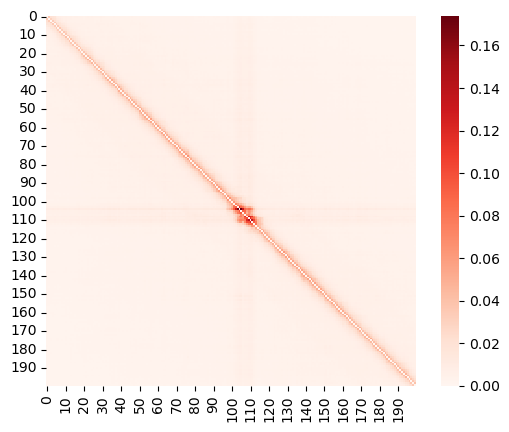

In [4]:
sns.heatmap(
    dfim_quantity_,
    cmap="Reds",
    square=True,
    xticklabels=10, 
    yticklabels=10
)

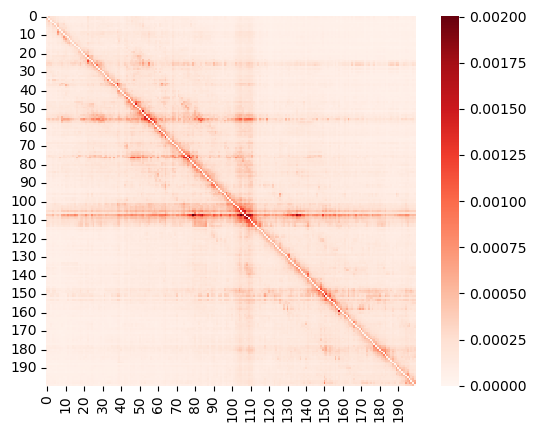

In [5]:
sns.heatmap(
    dfim_profile_,
    cmap="Reds",
    square=True,
    xticklabels=10, 
    yticklabels=10,
)
plt.savefig("irf4_dfim_profile.pdf")

In [6]:
dfim_profile.shape

(283, 500, 1000)